<a href="https://colab.research.google.com/github/viduliyanage7/ML-CW/blob/main/cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

df = pd.read_csv("data.csv")

In [228]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [229]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [230]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [231]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


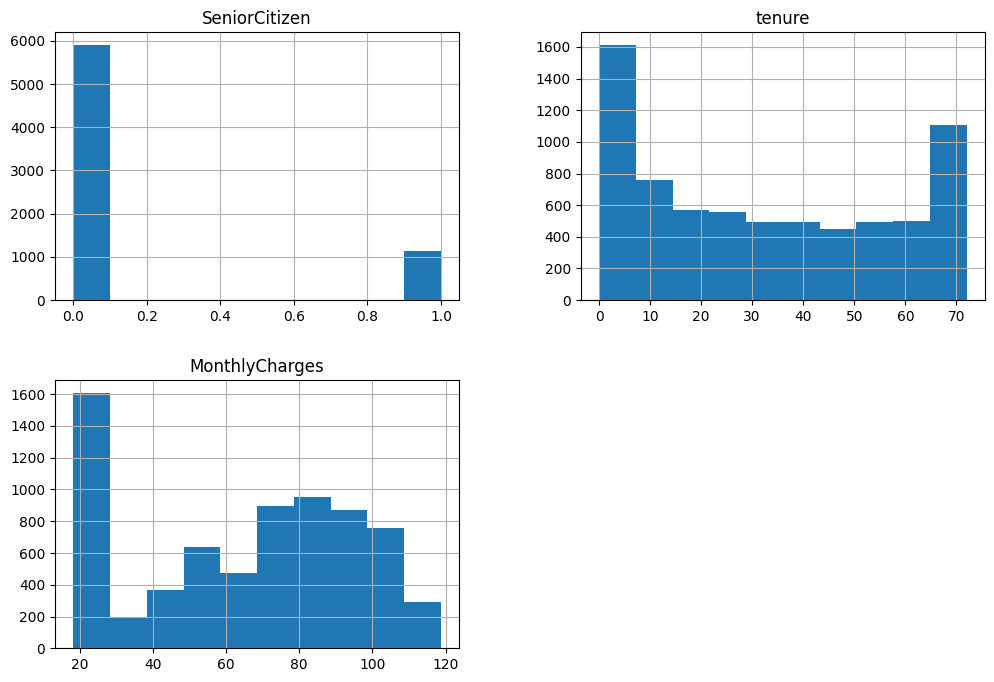

In [232]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,8))
plt.show()

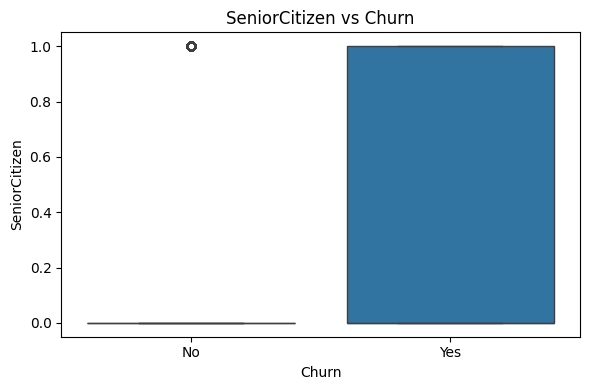

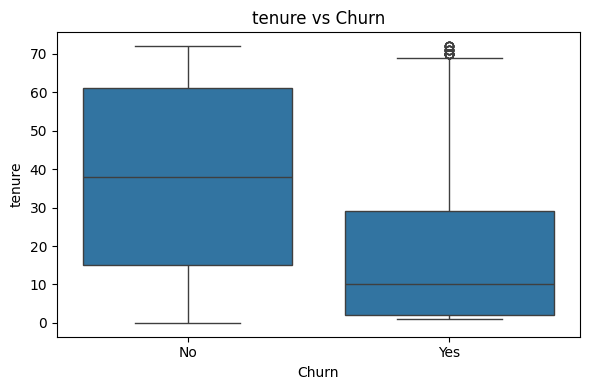

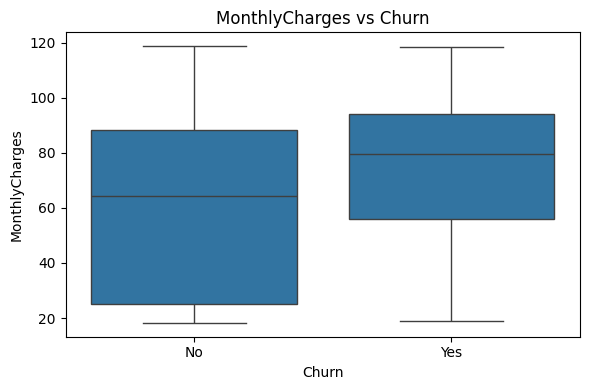

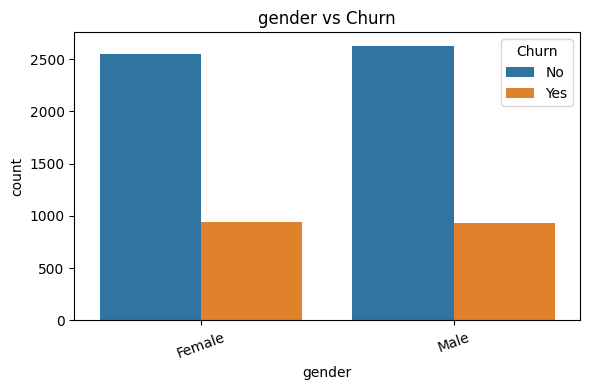

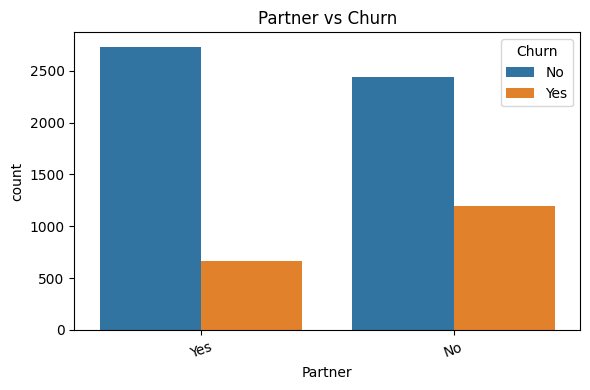

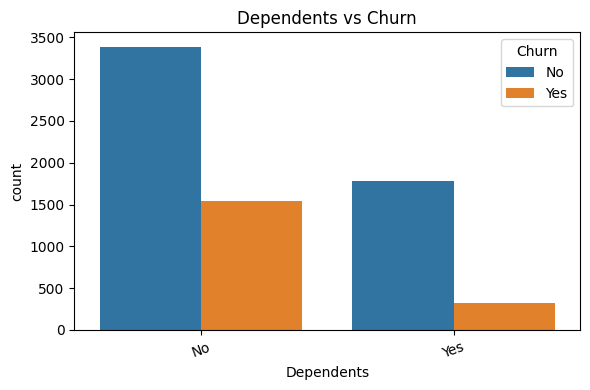

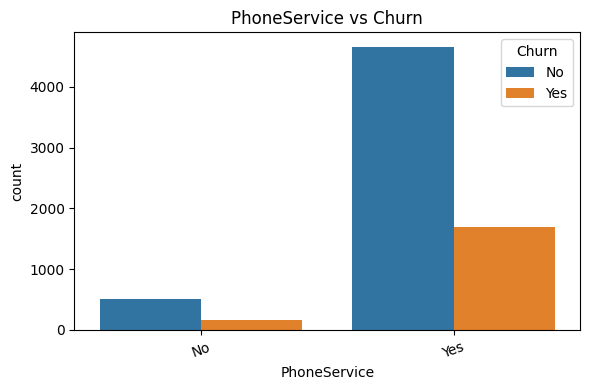

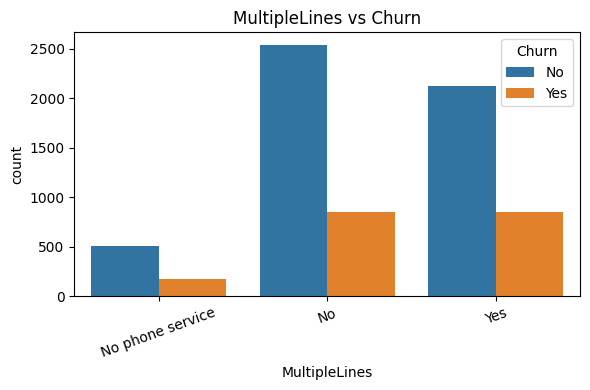

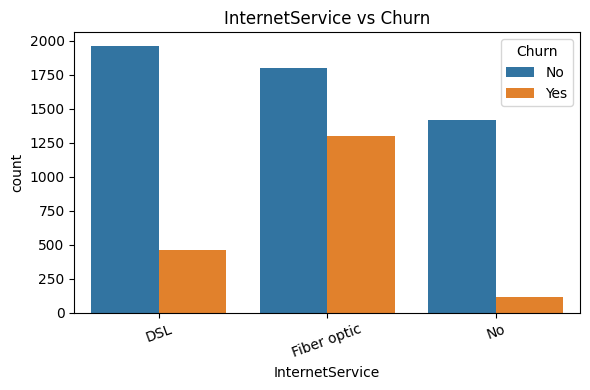

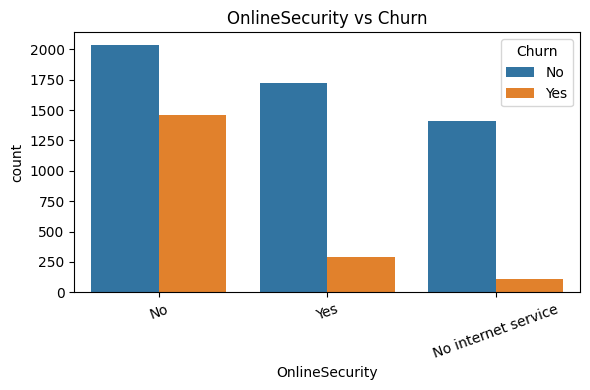

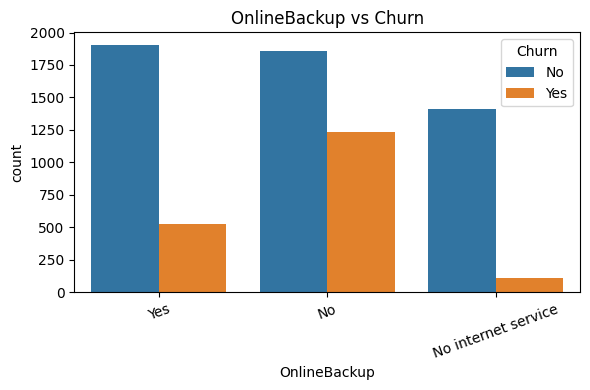

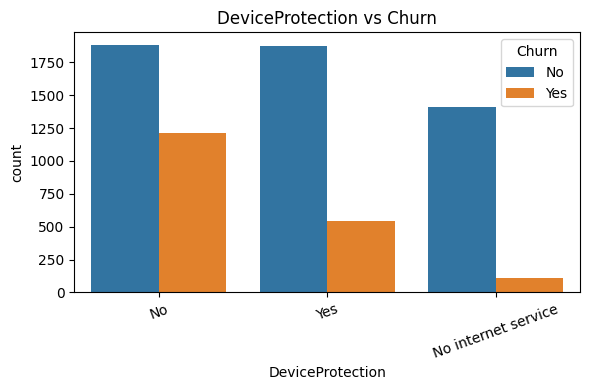

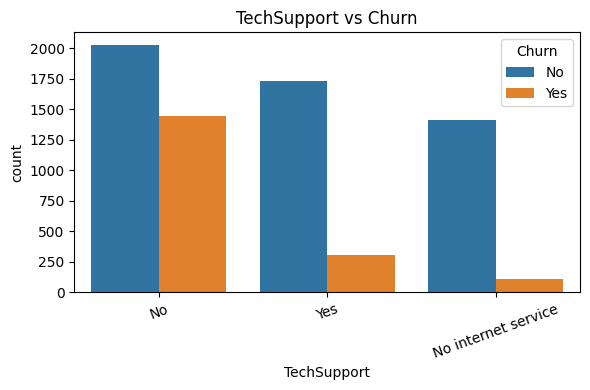

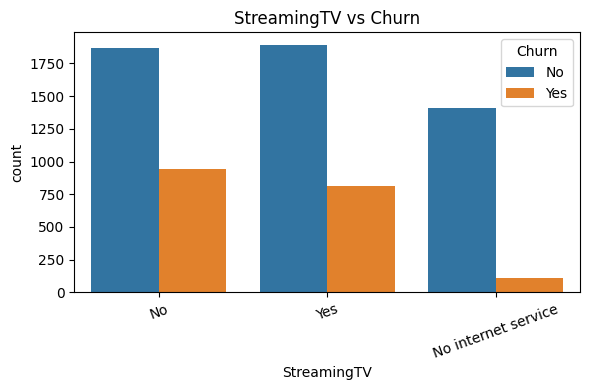

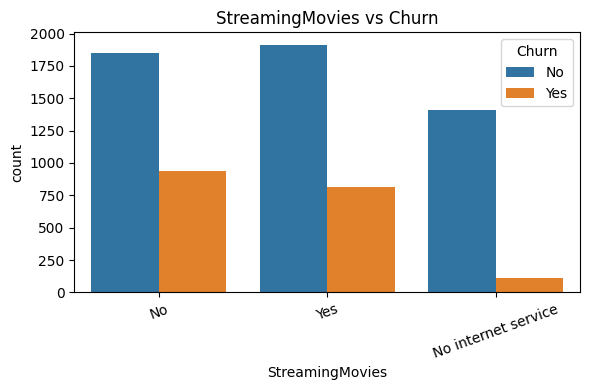

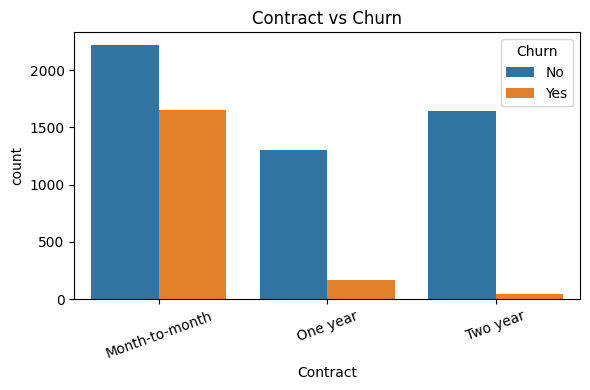

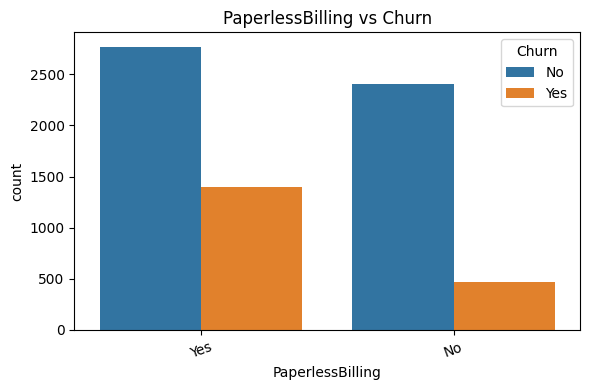

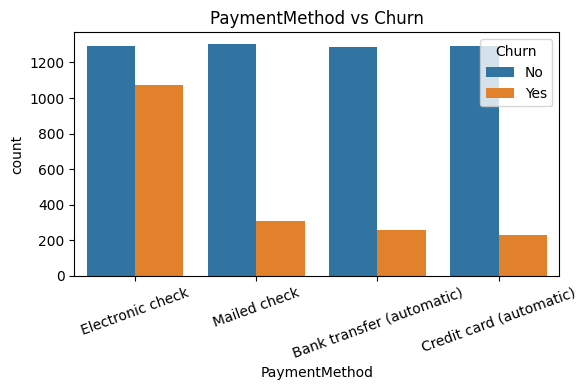

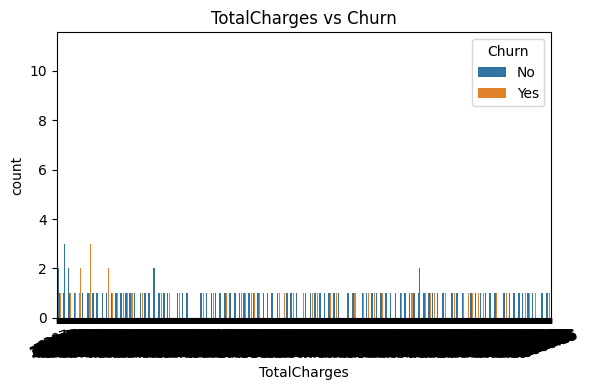

In [233]:
# Identify ID column (change name if needed)
id_col = "customerID"   # or whatever your ID column is
target = "Churn"

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object", "category"]).columns

# Remove target and ID from lists if present
numeric_cols = [col for col in numeric_cols if col not in [id_col, target]]
categorical_cols = [col for col in categorical_cols if col not in [id_col, target]]

# -------- Boxplots for numeric columns --------
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} vs {target}")
    plt.tight_layout()
    plt.show()

# -------- Countplots for categorical columns --------
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=target, data=df)
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

In [234]:
#check if dataset is balanced
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.463013
Yes,26.536987


In [235]:
#fix total_chares

import numpy as np
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [236]:
#remove unwanted columns
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [237]:
# store numerical values and categorical values
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [238]:
# encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
X_cat = encoder.fit_transform(df[categorical_features]).toarray()
X_num = df[numeric_features].values

X_processed = np.hstack([X_num, X_cat])


In [239]:
#test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

In [240]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [241]:
#check the dataset again for any imbalance
pd.Series(y_train_res).value_counts(normalize=True) * 100

,proportion
Churn,
0,50.0
1,50.0


In [242]:
#build decision tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1, criterion='gini')
clf.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=1)

In [243]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

dt_model = DecisionTreeClassifier(random_state=42)

dt_grid = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

dt_grid.fit(X_train_res, y_train_res)

print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best Decision Tree CV Accuracy:", dt_grid.best_score_)

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Decision Tree CV Accuracy: 0.8272670286206342


In [244]:
#train
best_dt = dt_grid.best_estimator_
best_dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       random_state=42)

In [245]:
#evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_dt = best_dt.predict(X_test)

print("\nDecision Tree Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Test Accuracy: 0.7665010645848119

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.55      0.61      0.58       374

    accuracy                           0.77      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409


Decision Tree Confusion Matrix:
 [[850 185]
 [144 230]]


In [246]:
pip install keras-tuner

In [247]:
import numpy as np
import pandas as pd

import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

from imblearn.over_sampling import SMOTE

np.random.seed(42)
tf.random.set_seed(42)

In [248]:
def build_model(hp):
    model = keras.Sequential()

    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))

    # Hidden Layer 1
    hp_units_1 = hp.Int('units_1', min_value=64, max_value=256, step=64)
    model.add(layers.Dense(units=hp_units_1, activation='relu'))
    model.add(layers.BatchNormalization())

    hp_dropout_1 = hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)
    model.add(layers.Dropout(rate=hp_dropout_1))

    # Hidden Layer 2
    hp_units_2 = hp.Int('units_2', min_value=32, max_value=128, step=32)
    model.add(layers.Dense(units=hp_units_2, activation='relu'))
    model.add(layers.BatchNormalization())

    hp_dropout_2 = hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)
    model.add(layers.Dropout(rate=hp_dropout_2))

    # Hidden Layer 3
    hp_units_3 = hp.Int('units_3', min_value=16, max_value=64, step=16)
    model.add(layers.Dense(units=hp_units_3, activation='relu'))

    # Output Layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Learning Rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )

    return model


In [249]:
tuner = kt.Hyperband(
    build_model,
    objective=kt.Objective('val_auc', direction='max'),
    max_epochs=20,
    factor=3,
    directory='kt_dir',
    project_name='nn_tuning',
    overwrite=True
)

In [250]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_auc',
    patience=5,
    mode='max',
    restore_best_weights=True
)

In [251]:
tuner.search(
    X_train_scaled,
    y_train_res,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Trial 30 Complete [00h 00m 12s]
val_auc: 0.0

Best val_auc So Far: 0.0
Total elapsed time: 00h 04m 46s


In [252]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.
The optimal number of units in layer 1 is {best_hps.get('units_1')}.
The optimal number of units in layer 2 is {best_hps.get('units_2')}.
The optimal number of units in layer 3 is {best_hps.get('units_3')}.
The optimal dropout rate in layer 1 is {best_hps.get('dropout_1')}.
The optimal dropout rate in layer 2 is {best_hps.get('dropout_2')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete.
The optimal number of units in layer 1 is 128.
The optimal number of units in layer 2 is 128.
The optimal number of units in layer 3 is 16.
The optimal dropout rate in layer 1 is 0.30000000000000004.
The optimal dropout rate in layer 2 is 0.4.
The optimal learning rate is 0.0001.



In [253]:
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    X_train_scaled,
    y_train_res,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5545 - auc: 0.6055 - loss: 0.8145 - val_accuracy: 0.8140 - val_auc: 0.0000e+00 - val_loss: 0.4679
Epoch 2/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6992 - auc: 0.7751 - loss: 0.6010 - val_accuracy: 0.7995 - val_auc: 0.0000e+00 - val_loss: 0.4743
Epoch 3/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7320 - auc: 0.7997 - loss: 0.5616 - val_accuracy: 0.8104 - val_auc: 0.0000e+00 - val_loss: 0.4707
Epoch 4/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7373 - auc: 0.8029 - loss: 0.5528 - val_accuracy: 0.8056 - val_auc: 0.0000e+00 - val_loss: 0.4698
Epoch 5/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7401 - auc: 0.8147 - loss: 0.5357 - val_accuracy: 0.8140 - val_auc: 0.0000e+00 - val_loss: 0.4654
Epoch 6/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7560 - auc: 0.8271 - loss: 0.5144 - val_accuracy: 0.8261 - val_auc: 0.0000e+00 - val_loss: 0.4472
Epoch 7/20
233/2

In [254]:
y_pred_prob = best_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

print(classification_report(y_test, y_pred))
print(f"Neural Network ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob):.4f}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.72      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409

Neural Network ROC-AUC Score: 0.8292


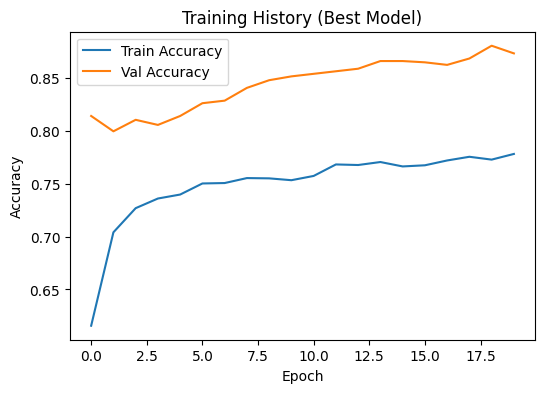

In [255]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History (Best Model)')
plt.legend()
plt.show()
